In [64]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
data = pd.read_csv("full_df.csv")

The following code is for the vectorization of ASJP code. Each index within the vector represents the relative frequency of that term within the word.

In [4]:
ASJPToIndex = {"i" : 0,
                "e" : 1,
                "E" : 2,
                "3" : 3,
                "a" : 4,
                "u" : 5,
                "o" : 6,
                "p" : 7,
                "b" : 8,
                "m" : 9,
                "f" : 10,
                "v" : 11,
                "8" : 12,
                "4" : 13,
                "t" : 14,
                "d" : 15,
                "s" : 16,
                "z" : 17,
                "c" : 18,
                "n" : 19,
                "S" : 20,
                "Z" : 21,
                "C" : 22,
                "j" : 23,
                "T" : 24,
                "5" : 25,
                "k" : 26,
                "g" : 27,
                "x" : 28,
                "N" : 29,
                "q" : 30,
                "G" : 31,
                "X" : 32,
                "7" : 33,
                "h" : 34,
                "l" : 35,
                "L" : 36,
                "w" : 37,
                "y" : 38,
                "r" : 39,
                "!" : 40}
#This method converts the given word to its vector form

vectors = pd.DataFrame(columns=range(0,40))
def getVector(string):
    ser = pd.Series(np.zeros(41), index=range(0,41))
    ser[41] = string.index[0]
    for c in string[0]:
        if c in ASJPToIndex:
            ser[ASJPToIndex[c]] += 1/len(string[0])
    global vectors
    vectors = vectors.append(ser,ignore_index=True)
#The following lines show example use
#bob = "aoelag"
#dave = 'xalk"ok"il'
#
#getVector(bob)
#vectors
#getVector(dave)
#vectors#.to_csv('bob.csv', sep=',', encoding='utf-8') #To file

In [5]:
#data.bark.dropna().apply(getVector) # cleaner but seems to obscure the column name
col = ['blood','bone','breast','die','dog','ear','eye','fish','one','two']
for i in col:
    pd.DataFrame(data, columns=[i]).dropna().apply(getVector, axis=1)

In [7]:
features = list(range(0,41))
X = vectors[features]
Y = vectors[41]


In [8]:
from sklearn.cross_validation import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=33)

C:\Users\Nicos\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
print(rf.feature_importances_)

[0.01 0.   0.04 0.   0.03 0.08 0.02 0.02 0.21 0.18 0.02 0.02 0.   0.
 0.03 0.04 0.06 0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.01
 0.   0.06 0.   0.   0.   0.   0.   0.04 0.   0.01 0.   0.1  0.  ]


In [60]:
yPred = rf.fit(xTrain,yTrain).predict(xTest)

In [61]:
confusionMatrix = confusion_matrix(yTest,yPred)

In [62]:
print(confusionMatrix)

[[166  84   8   3 154 523 501  16  33 198]
 [ 59 204   9  21 355 481 320  17  29 168]
 [ 33  97 188   7 273 440 358  22  27 158]
 [ 42  91   8  92 270 263 648  32  35  90]
 [ 53 142   9   5 500 381 337  15  34 158]
 [ 79 106   3   4 203 893 255   8  41 149]
 [ 73  98  10   5  98 422 863   4  55 103]
 [ 76 136  16  13 229 424 508  25  55 131]
 [ 45 114  10   5 142 548 597  10  86 121]
 [105 138  17  10 281 422 284  12  36 463]]


Confusion matrix, without normalization
[[166  84   8   3 154 523 501  16  33 198]
 [ 59 204   9  21 355 481 320  17  29 168]
 [ 33  97 188   7 273 440 358  22  27 158]
 [ 42  91   8  92 270 263 648  32  35  90]
 [ 53 142   9   5 500 381 337  15  34 158]
 [ 79 106   3   4 203 893 255   8  41 149]
 [ 73  98  10   5  98 422 863   4  55 103]
 [ 76 136  16  13 229 424 508  25  55 131]
 [ 45 114  10   5 142 548 597  10  86 121]
 [105 138  17  10 281 422 284  12  36 463]]


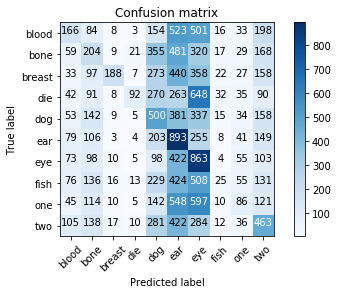

In [70]:
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confusionMatrix, classes=col,
                      title='Confusion matrix')
#plot_confusion_matrix(confusionMatrix, classes=col, normalize=True,
  #                    title='Confusion matrix')

plt.show()

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))                                      

[0.18 0.18 0.2  0.19 0.19]
Accuracy: 0.19 (+/- 0.02)


In [71]:
nbclf = GaussianNB()
nbYpred = nbclf.fit(xTrain,yTrain).predict(xTest)
nbConfusionMatrix = confusion_matrix(yTest,nbYpred)

Confusion matrix, without normalization
[[  14  609   47   32   61    3   41   42  736  101]
 [   5  782   44   48   61    5   26   25  638   29]
 [   3  355  265   34   47    5   39   35  725   95]
 [   4  374   41  190   41    4   16   34  806   61]
 [   2  576   69   34  165    4   22   35  709   18]
 [  18  722   22   55   45    3   49   25  757   45]
 [   6  363   63   39   29    1   81   63 1029   57]
 [   3  498   93   47   53    8   42   72  778   19]
 [   8  360   42   30   39    2   24   28 1092   53]
 [   5  686   55   32   63    3   33   26  712  153]]


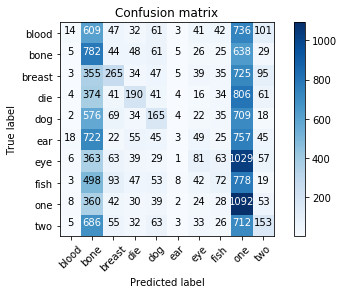

In [72]:
plt.figure()
plot_confusion_matrix(nbConfusionMatrix, classes=col,
                      title='Confusion matrix')
plt.show()